In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import string

import plotly.plotly as py
import plotly.graph_objs as go
import cufflinks as cf
py.sign_in('cwesno', 'd9j28z04oo')


//anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [3]:
df = pd.read_csv('/python/billionaire/billionaire_data.csv', low_memory = False)

In [1]:
### analysis components
## type of billionaire (inherited vs self-made) over time
## box plot of net worth by industry
## box plot of net worth by year
## self made vs inheriated box plot
## histogram of net worth for 2014
df.head()

NameError: name 'df' is not defined

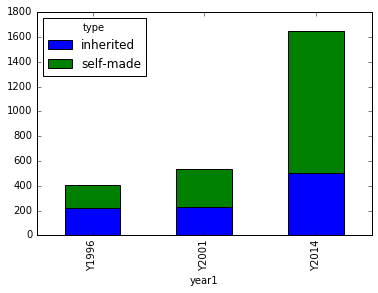

In [5]:

### type of billionaire (inherited vs self-made) over time

#only selecting necessary columns to do analysis
type_time = df[['year1', 'selfmade','name']].copy() 

#grouping before pivoting, counting up the names, and re_indexing
type_time = type_time.groupby(['year1','selfmade']).count().reset_index() 

#rename columns
type_time.columns = ['year1','type','count']

#pivot the table
type_time = type_time.pivot('year1', 'type', 'count')

#add Y in front of year..convert to string
#type_time['year_1'] = "Y" + type_time['year'].map(str)

#plotting dis shit!!!
myplot = type_time.plot.bar(stacked = True)


In [11]:
#time to make the plot above in using plot.ly graphs

#good reference if i don't want to use cufflinks
#py.iplot([{
#    'x': type_time.index,
#    'y': type_time[col],
#    'name': col
#}  for col in type_time.columns], filename='practice',)

layout = go.Layout(
    title = 'Total Billionaires in 1996, 2001, 2014',
    barmode='stack',
    bargap=.1,
    autosize=False,
    width=800,
    height=600,
    yaxis=dict(
        title = 'Number of people'
    ),
    margin=go.Margin(
        l=80,
        r=80,
        b=100,
        t=100,
        pad=2
    ))
    
    
#using cufflinks to derive data
cf.set_config_file(offline=False, world_readable=True, theme='ggplot')

#making the plot
type_time.iplot(layout = layout, kind='bar',filename='num_billionaire_by_year')




In [128]:
## box plot of net worth by industry

#only selecting necessary columns to do analysis
industry_worth = df[['year1', 'industry','networthusbillion']].copy() 

#since i don't want to plot all industries, i'll plot top 10  industries and bottom 10 industries in 2014

#getting the median salary by year and industry
industry_worth = industry_worth.groupby(['year1', 'industry']).median().reset_index()

#sorting to get the top 10 in 2014
industry_worth = industry_worth[industry_worth['year1'] == "Y2014"]
industry_worth.sort_values('networthusbillion', ascending=False, inplace=True)
industry_worth.reset_index(inplace=True)
industry_worth_top10 = industry_worth.head(10)

industry_worth_top10


,index,year1,industry,networthusbillion
0,46,Y2014,Private equity/leveraged buyout,2.90
1,38,Y2014,Diversified financial,2.50
2,41,Y2014,Media,2.45
3,48,Y2014,"Retail, Restaurant",2.45
4,37,Y2014,Consumer,2.40
5,49,Y2014,Technology-Computer,2.20
6,39,Y2014,Energy,2.10
7,45,Y2014,Other,2.10
8,43,Y2014,Money Management,2.05
9,47,Y2014,Real Estate,2.00


In [129]:
#sorting to get the bottom 10 in 2014

industry_worth = industry_worth[industry_worth['year1'] == "Y2014"]
industry_worth = industry_worth[industry_worth['industry'] <> "0"] #filter out the bad data
industry_worth.sort_values('networthusbillion', ascending=True, inplace=True)
industry_worth.reset_index(inplace=True)
industry_worth_bottom10 = industry_worth.head(10)

industry_worth_bottom10 = industry_worth_bottom10[['year1', 'industry','networthusbillion']]
industry_worth_bottom10

,year1,industry,networthusbillion
0,Y2014,Mining and metals,1.70
1,Y2014,Constrution,1.80
2,Y2014,Technology-Medical,1.85
3,Y2014,Venture Capital,1.90
4,Y2014,Real Estate,2.00
5,Y2014,Hedge funds,2.00
6,Y2014,Non-consumer industrial,2.00
7,Y2014,Money Management,2.05
8,Y2014,Energy,2.10
9,Y2014,Other,2.10


In [209]:
#declare dictionary with top 10
x_data = {'Private equity/leveraged buyout','Diversified financial','Media', 'Retail, Restaurant',\
         'Consumer', 'Technology-Computer','Energy', 'Other','Money Management','Real Estate'}
x_data

{'Consumer',
 'Diversified financial',
 'Energy',
 'Media',
 'Money Management',
 'Other',
 'Private equity/leveraged buyout',
 'Real Estate',
 'Retail, Restaurant',
 'Technology-Computer'}

In [213]:
#learning how dictionaries work -- i can iterate through them! (:
for industry in x_data:
    print industry

Technology-Computer
Media
Energy
Money Management
Other
Retail, Restaurant
Real Estate
Diversified financial
Private equity/leveraged buyout
Consumer


In [254]:
#y_values = {}
for industry in x_data:
    del industry_worth_3
    industry_worth_3 = df[['year1', 'industry','networthusbillion']].copy() 
    industry_worth_3 = industry_worth_3[industry_worth_3['year1'] == "Y2014"]
    industry_worth_3 = industry_worth_3[industry_worth_3['industry'] == industry]
    y_values[industry] = industry_worth_3[['networthusbillion']].values


In [332]:
y_data = [
    y_values['Technology-Computer'],
    y_values['Media'],
    y_values['Energy'],
    y_values['Money Management'],
    y_values['Other'],
    y_values['Retail, Restaurant'],
    y_values['Real Estate'],
    y_values['Diversified financial'],
    y_values['Private equity/leveraged buyout'],
    y_values['Consumer']
    
]
x_data = ['Private Equity','Diversified Financial','Media', 'Retail/Restaurant',\
         'Consumer', 'Tech-Comp','Energy', 'Other','Money Mgmt','Real Estate']
traces = []

for xd, yd in zip(x_data, y_data):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.1,
            marker=dict(
                size=2,
            ),
            line=dict(width=1),
        ))

layout = go.Layout(
    title='2014 Billionaire Top 10 Industries - Net Worth  Industry',
    yaxis=dict(
        range=[0, 10],
        showgrid=True,
        zeroline=True,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2
    ),
    xaxis=dict(
    #title='Industry',
    titlefont=dict(
        family='Courier New, monospace',
        size=5,
        color='#7f7f7f')
    ),
    margin=go.Margin(
        l=50,
        r=50,
        b=60,
        t=60,
        pad=4
    ),
    width=800,
    height=400,
    showlegend=False
)


fig = go.Figure(data=traces, layout=layout)
py.iplot(fig, filename = 'top10industries_networth_2014')

In [12]:
#### box plot of net worth by year


#prepping data to get it all nice and clean
year_worth = df[['year1', 'networthusbillion']].copy() 
year_worth1996 = year_worth[year_worth['year1'] == "Y1996"]
year_worth2001 = year_worth[year_worth['year1'] == "Y2001"]
year_worth2014 = year_worth[year_worth['year1'] == "Y2014"]
y1996 = year_worth1996[['networthusbillion']].copy()
y2001 = year_worth2001[['networthusbillion']].copy()
y2014 = year_worth2014[['networthusbillion']].copy()

#getting all the data into usable form
x_data1 = ['Y1996', 'Y2001', 'Y2014']
y_data1 = [
    y1996.values,
    y2001.values,
    y2014.values
]

In [13]:
traces = []
for xd, yd in zip(x_data1, y_data1):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.2,
            marker=dict(
                size=2,
            ),
            line=dict(width=1),
        ))

layout = go.Layout(
    title='Net Worth Distribution by Year',
    yaxis=dict(
        range=[0, 20],
        showgrid=True,
        zeroline=True,
        #dtick=5,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=go.Margin(
        l=50,
        r=50,
        b=60,
        t=60,
        pad=4
    ),
    width=800,
    height=500,
    showlegend=False
)

    
fig = go.Figure(data=traces, layout=layout)
py.iplot(fig, filename = 'networth_by_year')


In [306]:
#### self made vs inheriated box plot

#only selecting necessary columns to do analysis
money_type = df[['selfmade','networthusbillion']].copy() 


self_made = money_type[money_type['selfmade'] == "self-made"]
inherited = money_type[money_type['selfmade'] == "inherited"]
self_made1 = self_made[['networthusbillion']].copy()
inherited1 = inherited[['networthusbillion']].copy()


#getting all the data into usable form
x_data1 = ['self_made', 'inherited']
y_data1 = [
    self_made1.values,
    inherited1.values
]


In [335]:
traces = []
for xd, yd in zip(x_data1, y_data1):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.2,
            marker=dict(
                size=2,
            ),
            line=dict(width=1),
        ))

layout = go.Layout(
    title='Self-Made or Inherited',
    yaxis=dict(
        title = "$ in billions",
        range=[0, 20],
        showgrid=True,
        zeroline=True,
        #dtick=5,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=go.Margin(
        l=50,
        r=50,
        b=60,
        t=60,
        pad=4
    ),
    width=800,
    height=500,
    showlegend=False
)

    
fig = go.Figure(data=traces, layout=layout)
py.iplot(fig, filename = 'selfmade_box_whisker')


In [308]:
####histogram of net worth for 2014


#prepping data to get it all nice and clean
net_worth = df[['year1', 'networthusbillion']].copy() 
net_worth2014 = net_worth[net_worth['year1'] == "Y2014"]
year_2014 = net_worth2014[['networthusbillion']].copy()



In [340]:
data_2 = [
    go.Histogram(
        x=year_2014.values,
        opacity=0.50,
        marker=dict(
        color='BuPu',
        line=dict(
            color='grey',
            width=0)
        )
    )
]

layout = go.Layout(
    title = 'Distribution of Net Worth for 2014 Billionaires',
    xaxis=dict(
        range=[0, 40],
        title = 'Net worth in billions'
    ),
    yaxis=dict(
        title='Number of people')
)
fig = go.Figure(data=data_2, layout=layout)
py.iplot(fig, filename='histogram_networth_2014')